In [35]:
import tensorflow as tf
import tensorflow.keras as keras
import os
from matplotlib import pyplot as plt


import numpy as np
print('tensorflow {}'.format(tf.__version__))
print("keras {}".format(keras.__version__))

os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# https://usmanr149.github.io/urmlblog/cnn/2020/05/01/Salincy-Maps.html

tensorflow 2.4.1
keras 2.4.0


In [36]:
import matplotlib.pyplot as plt

In [65]:
# model = keras.applications.VGG16(weights='imagenet')
model = tf.keras.applications.VGG19(include_top=True, weights="imagenet", pooling='avg', classifier_activation="softmax",)

In [66]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

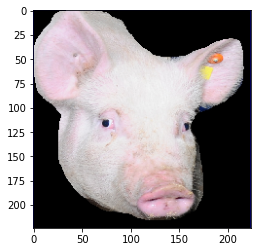

In [67]:
# _img = keras.preprocessing.image.load_img('../sample/DSC_V1_6460_2238.JPG',target_size=(224,224))
_img = keras.preprocessing.image.load_img(r'G:\temp\pig-face-rectangle\6357\DSC_V2_6357_2762.JPG-crop-mask0.jpg',target_size=(224,224))
plt.imshow(_img)
plt.show()

In [68]:
#preprocess image to get it into the right format for the model
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)

In [69]:
layers = [layer.output for layer in model.layers]

In [70]:
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [71]:
grads.shape

TensorShape([1, 224, 224, 3])

In [72]:
dgrad_abs = tf.math.abs(grads)

In [73]:
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

In [74]:
dgrad_max_.shape

(224, 224)

In [75]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

In [76]:
grad_eval.shape

(224, 224)

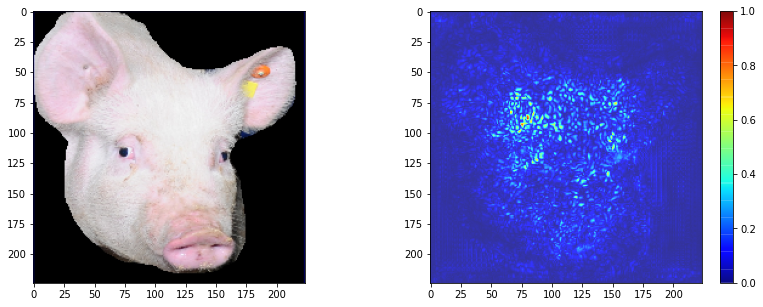

In [77]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)